# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [ ]:
!pip -q install ./python

The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from MADDPG_agent import MADDPG
from collections import deque
from matplotlib import pyplot as plt

env = UnityEnvironment(file_name="Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [2]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [4]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: 0.04500000085681677
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291


## The agents training process

Execute the cell below to train the agents. The training process will consider solved if the average score during 100 episodes reaches 0.5 points.

In [5]:
SOLVED = 0.5

agent = MADDPG(action_size=action_size, n_agents=num_agents, seed=0, t_stop_noise=25000)

def tennis(n_episodes=10000, train=True):
    
    scores_deque = deque(maxlen=100)
    result = []
    
    for i_episode in range(1, n_episodes+1):
        total = []
        env_info = env.reset(train_mode=train)[brain_name]    # reset the environment    
        state = env_info.vector_observations                  # get the current state (for each agent)

        while True:
            action = agent.act(state, add_noise=train)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations
            rewards = env_info.rewards
            done = env_info.local_done
            agent.step(state, action, rewards, next_state, done)
            state = next_state
            total.append(rewards)
            if any(done):
                break
                
        scores_deque.append(np.max(np.sum(np.array(total), axis=0))) # save most recent score to running window of 100 last scores
        avg_score = np.mean(scores_deque)
        result.append(avg_score)
        
        print('\rEpisode {}\tAverage Score: {:.3f}'.format(i_episode, avg_score),end="")
        
        # log average score every 100 episodes
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.3f}'.format(i_episode, avg_score))
    
        # break and report success if environment is solved
        if avg_score >= SOLVED and train:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.3f}'.format(i_episode, np.mean(scores_deque)))
            agent.save_agents()
            break
        
    return result

scores = tennis(n_episodes=10000, train=True)


Episode 100	Average Score: 0.005
Episode 200	Average Score: 0.002
Episode 300	Average Score: 0.008
Episode 400	Average Score: 0.017
Episode 500	Average Score: 0.003
Episode 600	Average Score: 0.024
Episode 700	Average Score: 0.045
Episode 800	Average Score: 0.041
Episode 900	Average Score: 0.068
Episode 1000	Average Score: 0.071
Episode 1100	Average Score: 0.064
Episode 1200	Average Score: 0.083
Episode 1300	Average Score: 0.177
Episode 1400	Average Score: 0.392
Episode 1500	Average Score: 0.403
Episode 1539	Average Score: 0.515
Environment solved in 1539 episodes!	Average Score: 0.515


## Printing the training resuts

View the training evolution and performance 

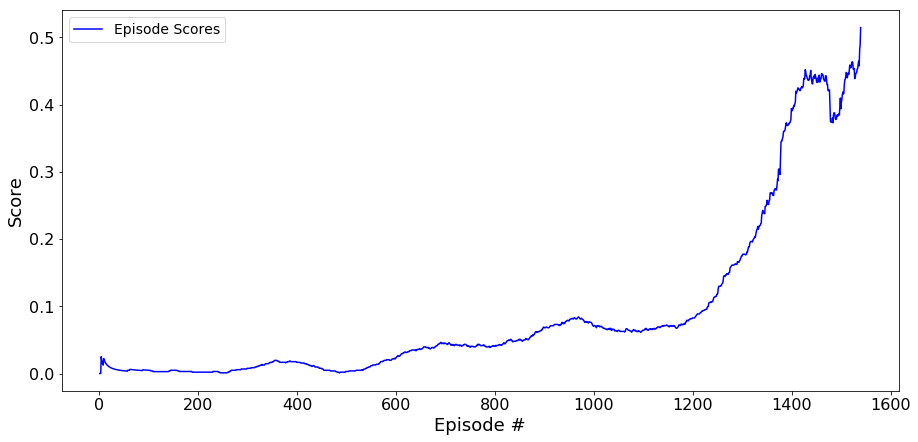

In [6]:
import matplotlib

matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores,'b',label='Episode Scores')
plt.ylabel('Score', fontsize=18)
plt.xlabel('Episode #', fontsize=18)
ax.legend(fontsize=14)
plt.show()

Executing the playing mode to find out how good the agents proceed and if they can solve the environment. 

In [7]:
scores = tennis(n_episodes=100, train=False)

Episode 100	Average Score: 1.384


## Printing the playing mode results:

View the averege scores during 100 episodes.

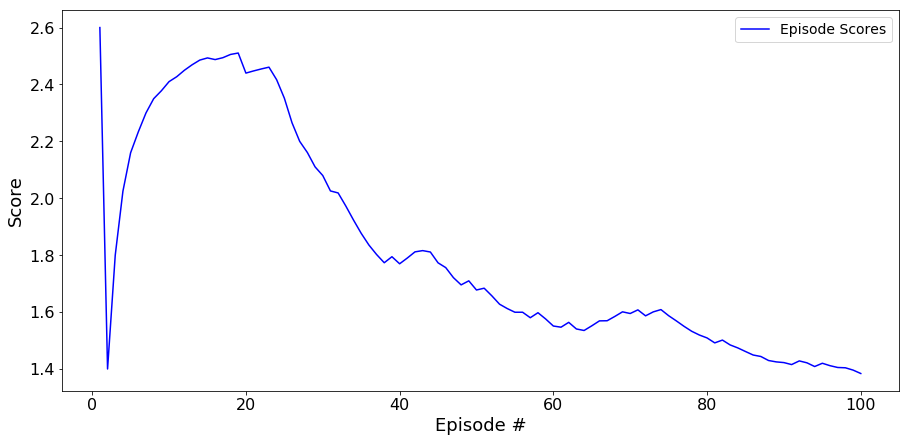

In [8]:
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16


fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores,'b',label='Episode Scores')
plt.ylabel('Score', fontsize=18)
plt.xlabel('Episode #', fontsize=18)
ax.legend(fontsize=14)
plt.show()

When finished, you can close the environment.

In [ ]:
env.close()